# Convolutional Neural-Networks

## Plan

1. Load in both MNIST and EMNIST. Validation set is MNIST (should be like 99%). Test set is EMNIST. - see generalisability.
2. Augment MNIST with transformations and see the difference in performance on EMNIST test set. 
3. Augment again with a preselected set of decent EMNIST data, and maybe gaussian noise. Grow model and try to keep generalisability score the same.

In [10]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
x_train.shape

(60000, 28, 28)

Train

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, MaxPooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Reshape the images to add a dimension for the channel
x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_cnn = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [14]:
# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)), # Input shape: this is the shape of one image, it has 1 dimension (greyscale)
    MaxPool2D(pool_size=(2, 2)),           # This layer performs max pooling with a 2 x 2 filter, reducing the dimensions (height and width) of the feature maps by half.

    Conv2D(32, (3, 3), activation='relu'), # This layer applies 32 differnt filters (each 3 x 3), each filter extracts different features (edges, corners, etc.)
                                           # ReLU activation is used to introduce non-linearity, allowing the model to learn more complex patterns. 

    MaxPool2D(pool_size=(2, 2)),           # This layer performs max pooling with a 2 x 2 filter, reducing the dimensions (height and width) of the feature maps by half.

    Flatten(),                             # This layer flattens the 2D feature maps into a 1D vector, which can be used as input to a fully connected neural network.

    Dense(256, activation='relu'),         # This layer has 256 neurons and uses ReLU activation.

    Dropout(0.5),                          # Regularisation technique where randomly selected neurons are ignored during training. This helps prevent overfitting.

    Dense(10, activation='softmax')        # This layer has 10 neurons and uses softmax activation. Softmax activation enables you to calculate probabilities for each class score.
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Define the CNN model
cnn_model_2 = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second Convolutional Block (Removed third block to reduce complexity)
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flattening the convolutions
    Flatten(),

    # Dense Layers (Reduced the number of neurons to lower the parameter count)
    Dense(256, activation='relu'),  # Reduced from 512 to 256
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),  # Reduced from 256 to 128
    BatchNormalization(),
    Dropout(0.5),

    # Output Layer
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
import random
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation, RandomZoom, RandomTranslation, Resizing, RandomContrast
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def random_gaussian_noise(x):
    if random.random() < 0.5:  # 50% chance to add Gaussian noise
        scale = np.random.uniform(0.0001, 0.00000005)
        return x + np.random.normal(loc=0, scale=scale, size=x.shape)
    else:
        return x

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest',
    # featurewise_std_normalization=True,  # Normalize the dataset
    # preprocessing_function=random_gaussian_noise  # Add Gaussian noise
)

# Fit the data augmentation on the combined training dataset
datagen.fit(x_train_cnn)

# Generate a batch of augmented images and labels
augmented_images, augmented_labels = next(datagen.flow(x_train_cnn, y_train, batch_size=64))

# # Display the first image in the batch
# plt.figure(figsize=(10,  10))
# for i in range(20):  # Displaying  20 images in a  5x4 grid
#     plt.subplot(5,  4, i +  1)
#     plt.imshow(augmented_images[i].reshape(28,  28), cmap='gray')
#     plt.axis('off')
# plt.show()

# Define the CNN model
cnn_model_3 = Sequential([
    Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)), # Input shape: this is the shape of one image, it has 1 dimension (greyscale)
    MaxPool2D(pool_size=(2, 2)),           # This layer performs max pooling with a 2 x 2 filter, reducing the dimensions (height and width) of the feature maps by half.

    Conv2D(32, (3, 3), activation='relu'), # This layer applies 32 differnt filters (each 3 x 3), each filter extracts different features (edges, corners, etc.)
                                           # ReLU activation is used to introduce non-linearity, allowing the model to learn more complex patterns. 

    MaxPool2D(pool_size=(2, 2)),           # This layer performs max pooling with a 2 x 2 filter, reducing the dimensions (height and width) of the feature maps by half.

    Flatten(),                             # This layer flattens the 2D feature maps into a 1D vector, which can be used as input to a fully connected neural network.

    Dense(256, activation='relu'),         # This layer has 256 neurons and uses ReLU activation.

    Dropout(0.5),                          # Regularisation technique where randomly selected neurons are ignored during training. This helps prevent overfitting.

    Dense(10, activation='softmax')        # This layer has 10 neurons and uses softmax activation. Softmax activation enables you to calculate probabilities for each class score.
])

# Compile the model
cnn_model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

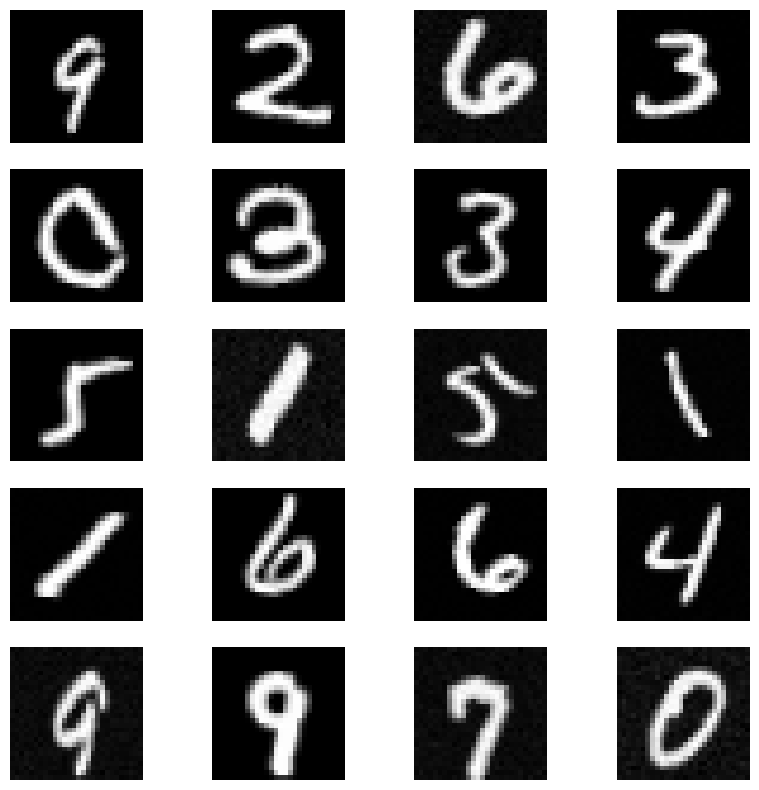

In [17]:
import random
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation, RandomZoom, RandomTranslation, Resizing, RandomContrast
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def random_gaussian_noise(x):
    if random.random() < 0.5:  # 50% chance to add Gaussian noise
        scale = np.random.uniform(0.025, 0.000005)
        return x + np.random.normal(loc=0, scale=scale, size=x.shape)
    else:
        return x

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest',
    featurewise_std_normalization=True,  # Normalize the dataset
    preprocessing_function=random_gaussian_noise  # Add Gaussian noise
)

# Fit the data augmentation on the combined training dataset
datagen.fit(x_train_cnn)

# Generate a batch of augmented images and labels
augmented_images, augmented_labels = next(datagen.flow(x_train_cnn, y_train, batch_size=64))

# Display the first image in the batch
plt.figure(figsize=(10,  10))
for i in range(20):  # Displaying  20 images in a  5x4 grid
    plt.subplot(5,  4, i +  1)
    plt.imshow(augmented_images[i].reshape(28,  28), cmap='gray')
    plt.axis('off')
plt.show()

# Define the CNN model
cnn_model_4 = Sequential([
    Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)), # Input shape: this is the shape of one image, it has 1 dimension (greyscale)
    MaxPool2D(pool_size=(2, 2)),           # This layer performs max pooling with a 2 x 2 filter, reducing the dimensions (height and width) of the feature maps by half.

    Conv2D(32, (3, 3), activation='relu'), # This layer applies 32 differnt filters (each 3 x 3), each filter extracts different features (edges, corners, etc.)
                                           # ReLU activation is used to introduce non-linearity, allowing the model to learn more complex patterns. 

    MaxPool2D(pool_size=(2, 2)),           # This layer performs max pooling with a 2 x 2 filter, reducing the dimensions (height and width) of the feature maps by half.

    Flatten(),                             # This layer flattens the 2D feature maps into a 1D vector, which can be used as input to a fully connected neural network.

    Dense(256, activation='relu'),         # This layer has 256 neurons and uses ReLU activation.

    Dropout(0.5),                          # Regularisation technique where randomly selected neurons are ignored during training. This helps prevent overfitting.

    Dense(10, activation='softmax')        # This layer has 10 neurons and uses softmax activation. Softmax activation enables you to calculate probabilities for each class score.
])

# Compile the model
cnn_model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

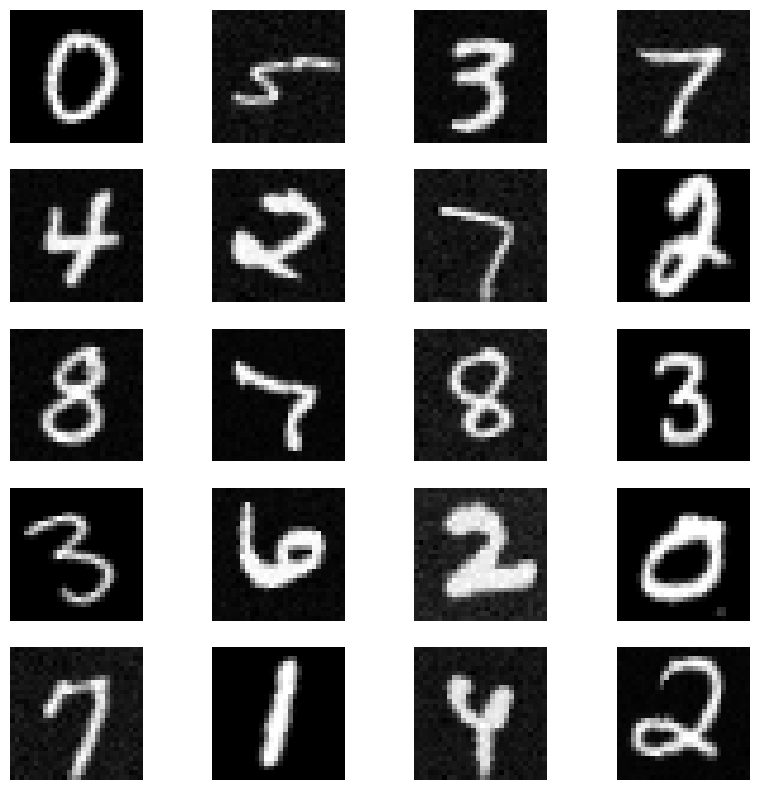

In [18]:
import random
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation, RandomZoom, RandomTranslation, Resizing, RandomContrast
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def random_gaussian_noise(x):
    if random.random() < 0.5:  # 50% chance to add Gaussian noise
        scale = np.random.uniform(0.04, 0.000005)
        return x + np.random.normal(loc=0, scale=scale, size=x.shape)
    else:
        return x

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest',
    featurewise_std_normalization=True,  # Normalize the dataset
    preprocessing_function=random_gaussian_noise  # Add Gaussian noise
)

# Fit the data augmentation on the combined training dataset
datagen.fit(x_train_cnn)

# Generate a batch of augmented images and labels
augmented_images, augmented_labels = next(datagen.flow(x_train_cnn, y_train, batch_size=64))

# Display the first image in the batch
plt.figure(figsize=(10,  10))
for i in range(20):  # Displaying  20 images in a  5x4 grid
    plt.subplot(5,  4, i +  1)
    plt.imshow(augmented_images[i].reshape(28,  28), cmap='gray')
    plt.axis('off')
plt.show()

# Define the CNN model
cnn_model_5 = Sequential([
    Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)), # Input shape: this is the shape of one image, it has 1 dimension (greyscale)
    MaxPool2D(pool_size=(2, 2)),           # This layer performs max pooling with a 2 x 2 filter, reducing the dimensions (height and width) of the feature maps by half.

    Conv2D(32, (3, 3), activation='relu'), # This layer applies 32 differnt filters (each 3 x 3), each filter extracts different features (edges, corners, etc.)
                                           # ReLU activation is used to introduce non-linearity, allowing the model to learn more complex patterns. 

    MaxPool2D(pool_size=(2, 2)),           # This layer performs max pooling with a 2 x 2 filter, reducing the dimensions (height and width) of the feature maps by half.

    Flatten(),                             # This layer flattens the 2D feature maps into a 1D vector, which can be used as input to a fully connected neural network.

    Dense(256, activation='relu'),         # This layer has 256 neurons and uses ReLU activation.

    Dropout(0.5),                          # Regularisation technique where randomly selected neurons are ignored during training. This helps prevent overfitting.

    Dense(10, activation='softmax')        # This layer has 10 neurons and uses softmax activation. Softmax activation enables you to calculate probabilities for each class score.
])

# Compile the model
cnn_model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

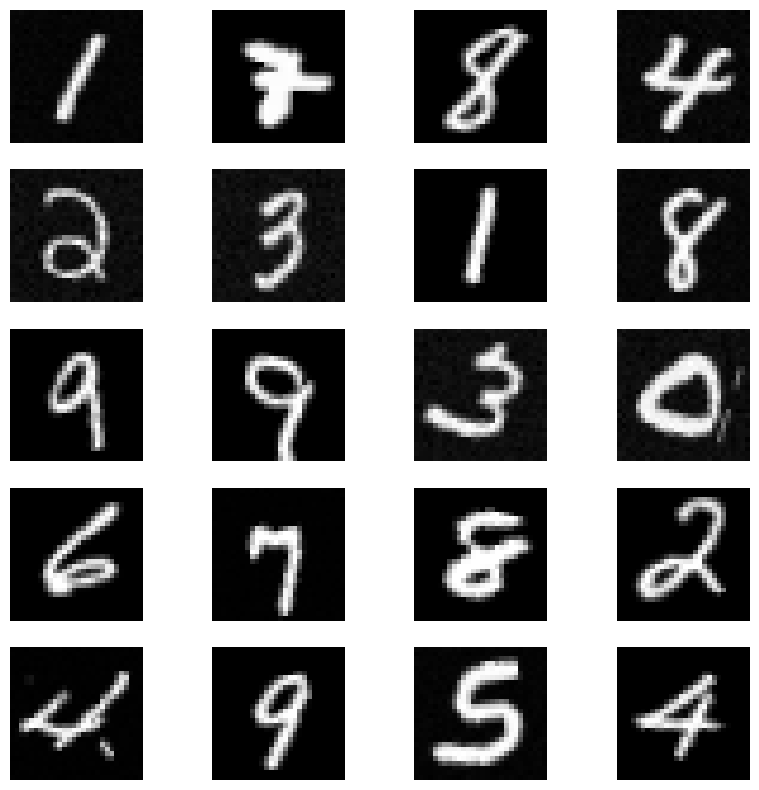

In [19]:
import random
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation, RandomZoom, RandomTranslation, Resizing, RandomContrast
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def random_gaussian_noise(x):
    if random.random() < 0.5:  # 50% chance to add Gaussian noise
        scale = np.random.uniform(0.025, 0.000005)
        return x + np.random.normal(loc=0, scale=scale, size=x.shape)
    else:
        return x

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest',
    featurewise_std_normalization=True,  # Normalize the dataset
    preprocessing_function=random_gaussian_noise  # Add Gaussian noise
)

# Fit the data augmentation on the combined training dataset
datagen.fit(x_train_cnn)

# Generate a batch of augmented images and labels
augmented_images, augmented_labels = next(datagen.flow(x_train_cnn, y_train, batch_size=64))

# Display the first image in the batch
plt.figure(figsize=(10,  10))
for i in range(20):  # Displaying  20 images in a  5x4 grid
    plt.subplot(5,  4, i +  1)
    plt.imshow(augmented_images[i].reshape(28,  28), cmap='gray')
    plt.axis('off')
plt.show()

# Define the CNN model
cnn_model_6 = Sequential([
    Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)), # Input shape: this is the shape of one image, it has 1 dimension (greyscale)
    MaxPool2D(pool_size=(2, 2)),           # This layer performs max pooling with a 2 x 2 filter, reducing the dimensions (height and width) of the feature maps by half.

    Conv2D(32, (3, 3), activation='relu'), # This layer applies 32 differnt filters (each 3 x 3), each filter extracts different features (edges, corners, etc.)
                                           # ReLU activation is used to introduce non-linearity, allowing the model to learn more complex patterns. 

    MaxPool2D(pool_size=(2, 2)),           # This layer performs max pooling with a 2 x 2 filter, reducing the dimensions (height and width) of the feature maps by half.

    Flatten(),                             # This layer flattens the 2D feature maps into a 1D vector, which can be used as input to a fully connected neural network.

    Dense(256, activation='relu'),         # This layer has 256 neurons and uses ReLU activation.

    Dropout(0.5),                          # Regularisation technique where randomly selected neurons are ignored during training. This helps prevent overfitting.

    Dense(10, activation='softmax')        # This layer has 10 neurons and uses softmax activation. Softmax activation enables you to calculate probabilities for each class score.
])

# Compile the model
cnn_model_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Train the CNN model
cnn_history = cnn_model.fit(x_train_cnn, y_train, epochs=10, batch_size=256, validation_split=0.2)

Epoch 1/10
  1/188 [..............................] - ETA: 35s - loss: 2.3120 - accuracy: 0.0859

2024-02-19 14:43:14.308080: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


188/188 [==============================] - 4s 20ms/step - loss: 0.3924 - accuracy: 0.8812 - val_loss: 0.0897 - val_accuracy: 0.9736
Epoch 2/10
188/188 [==============================] - 4s 21ms/step - loss: 0.0984 - accuracy: 0.9703 - val_loss: 0.0560 - val_accuracy: 0.9838
Epoch 3/10
188/188 [==============================] - 4s 24ms/step - loss: 0.0701 - accuracy: 0.9789 - val_loss: 0.0481 - val_accuracy: 0.9856
Epoch 4/10
141/188 [=====================>........] - ETA: 0s - loss: 0.0578 - accuracy: 0.9824

KeyboardInterrupt: 

In [ ]:
cnn_2_history_2 = cnn_model_2.fit(x_train_cnn, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 11s 15ms/step - loss: 0.3522 - accuracy: 0.8918 - val_loss: 0.0986 - val_accuracy: 0.9712
Epoch 2/10
750/750 [==============================] - 11s 15ms/step - loss: 0.1223 - accuracy: 0.9632 - val_loss: 0.0585 - val_accuracy: 0.9833
Epoch 3/10
750/750 [==============================] - 11s 15ms/step - loss: 0.0939 - accuracy: 0.9721 - val_loss: 0.0534 - val_accuracy: 0.9852
Epoch 4/10
750/750 [==============================] - 11s 15ms/step - loss: 0.0820 - accuracy: 0.9760 - val_loss: 0.0408 - val_accuracy: 0.9883
Epoch 5/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0715 - accuracy: 0.9790 - val_loss: 0.0361 - val_accuracy: 0.9891
Epoch 6/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0601 - accuracy: 0.9820 - val_loss: 0.0367 - val_accuracy: 0.9893
Epoch 7/10
750/750 [==============================] - 11s 15ms/step - loss: 0.0606 - accuracy: 0.9816 - val_loss: 0.0365 - val_accuracy:

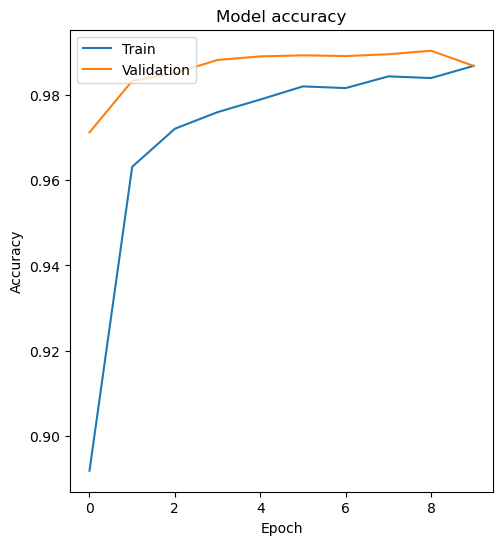

In [ ]:
# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_2_history_2.history['accuracy'])
plt.plot(cnn_2_history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
# Train the CNN model using augmented data
cnn_history_3 = cnn_model_3.fit(
    datagen.flow(x_train_cnn, y_train, batch_size=256),
    epochs=10,
    validation_data=(x_val, y_val)  # Assuming x_val and y_val are already defined and preprocessed
)

# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history_3.history['accuracy'])
plt.plot(cnn_history_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

NameError: name 'x_val' is not defined

Epoch 1/10


2024-02-18 15:12:43.218176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


235/235 [==============================] - 6s 25ms/step - loss: 0.3103 - accuracy: 0.9045 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 2/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0900 - accuracy: 0.9728 - val_loss: 2.3064 - val_accuracy: 0.1000
Epoch 3/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0675 - accuracy: 0.9796 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 4/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0579 - accuracy: 0.9825 - val_loss: 2.3053 - val_accuracy: 0.1000
Epoch 5/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0515 - accuracy: 0.9844 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 6/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0453 - accuracy: 0.9863 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 7/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0402 - accuracy: 0.9878 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 8/10

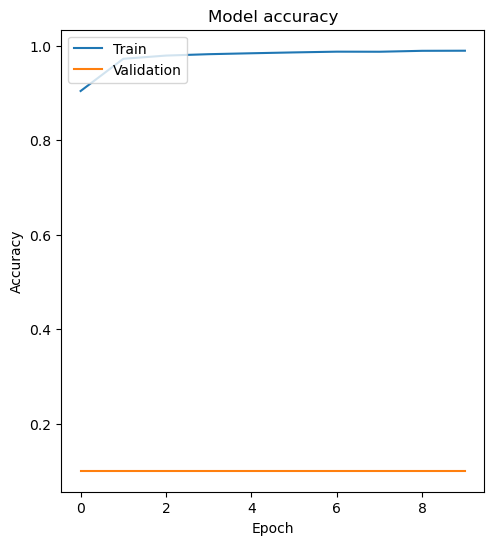

In [ ]:
# Train the CNN model using augmented data
cnn_history_4 = cnn_model_4.fit(
    datagen.flow(x_train_cnn, y_train, batch_size=256),
    epochs=10,
    validation_data=(x_val, y_val)  # Assuming x_val and y_val are already defined and preprocessed
)

# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history_4.history['accuracy'])
plt.plot(cnn_history_4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
# Train the CNN model using augmented data
cnn_history_5 = cnn_model_5.fit(
    x_train_cnn, y_train, batch_size=256,
    epochs=10,
    validation_data=(x_val, y_val)  # Assuming x_val and y_val are already defined and preprocessed
)

# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history_5.history['accuracy'])
plt.plot(cnn_history_5.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

Epoch 1/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0380 - accuracy: 0.9900 - val_loss: 2.3111 - val_accuracy: 0.1000
Epoch 2/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0253 - accuracy: 0.9923 - val_loss: 2.3076 - val_accuracy: 0.1000
Epoch 3/10
129/235 [===============>..............] - ETA: 2s - loss: 0.0202 - accuracy: 0.9940

KeyboardInterrupt: 

Epoch 1/20


/Users/oscarmoxon/anaconda3/envs/NN/lib/python3.11/site-packages/keras/preprocessing/image.py:1460: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(
2024-02-19 14:43:32.593396: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


745/750 [============================>.] - ETA: 0s - loss: 0.2439 - accuracy: 0.9234

2024-02-19 14:43:39.513170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


750/750 [==============================] - 8s 10ms/step - loss: 0.2431 - accuracy: 0.9237 - val_loss: 0.0607 - val_accuracy: 0.9812
Epoch 2/20
750/750 [==============================] - 7s 9ms/step - loss: 0.0946 - accuracy: 0.9710 - val_loss: 0.0409 - val_accuracy: 0.9869
Epoch 3/20
750/750 [==============================] - 6s 9ms/step - loss: 0.0735 - accuracy: 0.9778 - val_loss: 0.0364 - val_accuracy: 0.9890
Epoch 4/20
750/750 [==============================] - 6s 9ms/step - loss: 0.0632 - accuracy: 0.9811 - val_loss: 0.0392 - val_accuracy: 0.9884
Epoch 5/20
750/750 [==============================] - 7s 9ms/step - loss: 0.0562 - accuracy: 0.9833 - val_loss: 0.0308 - val_accuracy: 0.9910
Epoch 6/20
750/750 [==============================] - 7s 9ms/step - loss: 0.0508 - accuracy: 0.9847 - val_loss: 0.0329 - val_accuracy: 0.9907
Epoch 7/20
750/750 [==============================] - 7s 9ms/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.0325 - val_accuracy: 0.9918
Epoch 8/20
750/7

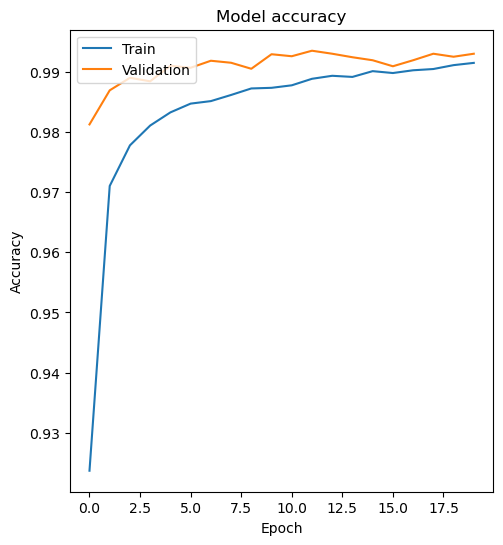

In [21]:
from sklearn.model_selection import train_test_split

# Assuming x_train_cnn and y_train are your full training dataset and labels
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train_cnn, y_train, test_size=0.2, random_state=42)

# Create a new ImageDataGenerator instance for validation (without data augmentation)
validation_datagen = ImageDataGenerator(featurewise_std_normalization=True)

# Fit the validation_datagen on the validation data
validation_datagen.fit(x_val_split)

# Create the data generators
train_generator = datagen.flow(x_train_split, y_train_split, batch_size=64)
validation_generator = validation_datagen.flow(x_val_split, y_val_split, batch_size=64)

# Train the CNN model using augmented data
cnn_history_6 = cnn_model_6.fit(
    train_generator,
    epochs=20,
    validation_data = validation_generator  # Assuming x_val and y_val are already defined and preprocessed
)

# Plot training and validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history_6.history['accuracy'])
plt.plot(cnn_history_6.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [22]:
cnn_model_6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 800)               0         
                                                                 
 dense_22 (Dense)            (None, 256)             

Eval

In [7]:
# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(x_test_cnn, y_test)
print("CNN Test Accuracy:", cnn_accuracy)

  1/313 [..............................] - ETA: 5s - loss: 0.0054 - accuracy: 1.0000

313/313 [==============================] - 1s 2ms/step - loss: 0.0253 - accuracy: 0.9923
CNN Test Accuracy: 0.9922999739646912


In [33]:
# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model_2.evaluate(x_test_cnn, y_test)
print("CNN Test Accuracy:", cnn_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0358 - accuracy: 0.9889
CNN Test Accuracy: 0.9889000058174133


In [48]:
# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model_3.evaluate(x_test_cnn, y_test)
print("CNN Test Accuracy:", cnn_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0191 - accuracy: 0.9941
CNN Test Accuracy: 0.9940999746322632


In [104]:
# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model_4.evaluate(x_test_cnn, y_test)
print("CNN Test Accuracy:", cnn_accuracy)

313/313 [==============================] - 0s 2ms/step - loss: 0.1306 - accuracy: 0.9928
CNN Test Accuracy: 0.9927999973297119


In [113]:
# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model_5.evaluate(x_test_cnn, y_test)
print("CNN Test Accuracy:", cnn_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3261 - accuracy: 0.9656
CNN Test Accuracy: 0.9656000137329102


In [36]:
# Evaluate CNN model
cnn_loss, cnn_accuracy = cnn_model_6.evaluate(x_test_cnn, y_test)
print("CNN Test Accuracy:", cnn_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2480 - accuracy: 0.9842
CNN Test Accuracy: 0.9842000007629395


### Convert Probabilities into Prediction Classes

In [8]:
import matplotlib.pyplot as plt
import numpy as np

313/313 [==============================] - 1s 2ms/step


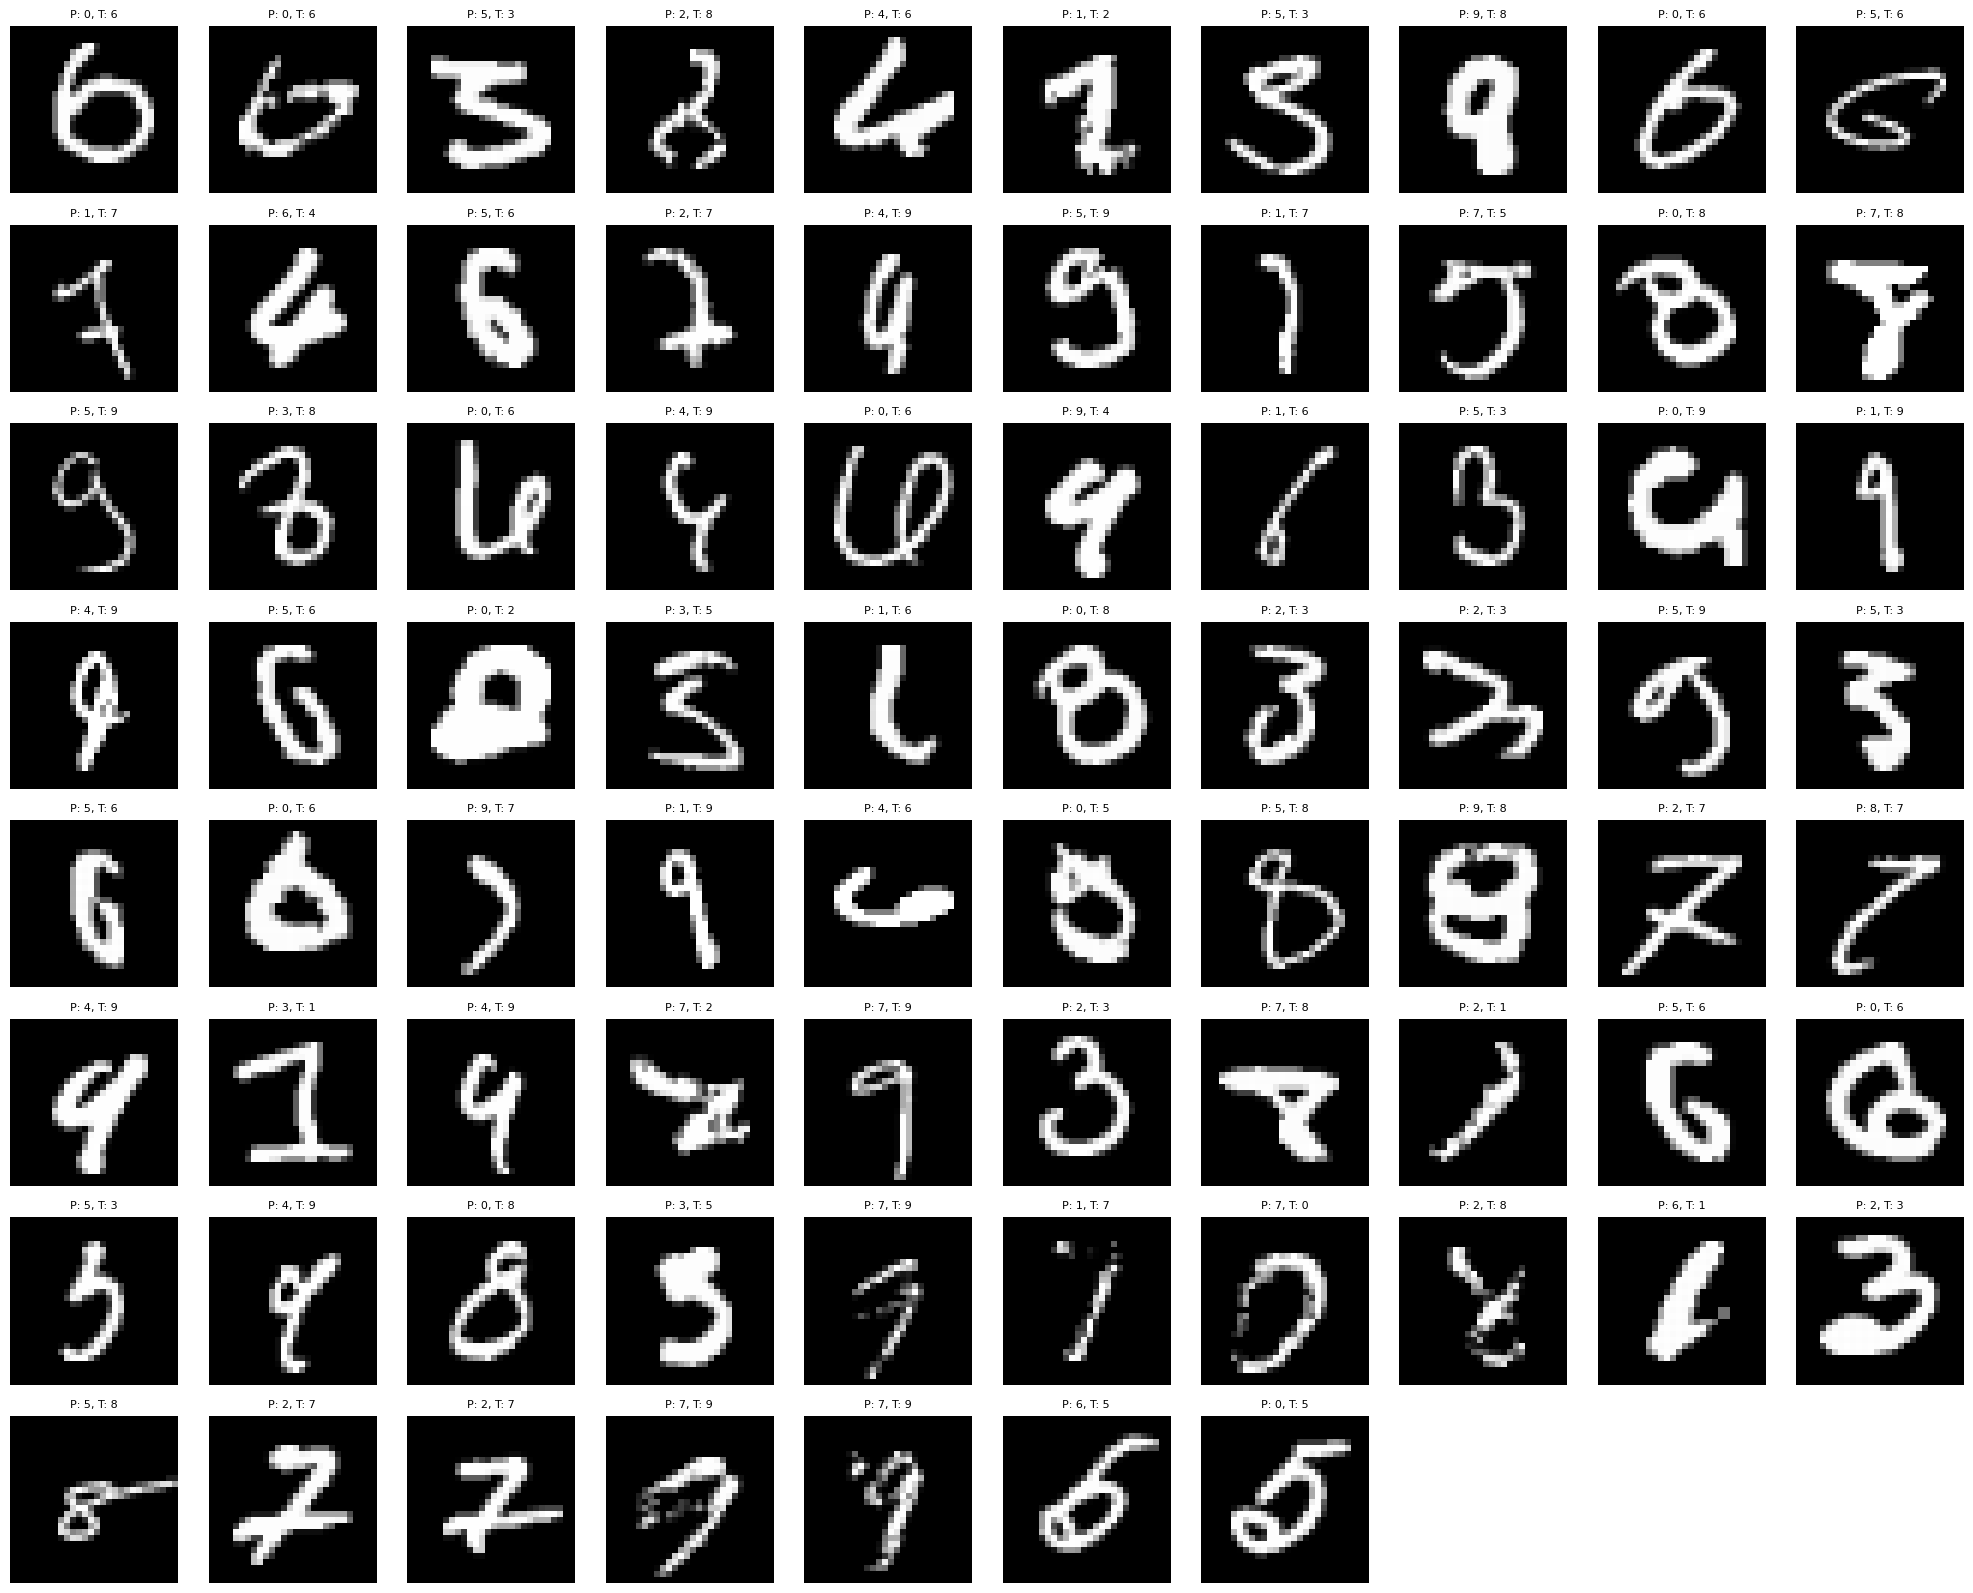

In [9]:
# Predict the labels for the test set
y_pred = cnn_model.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Identify the indices of misclassified examples
misclassified_indices = np.where(y_pred_classes != y_true)[0]

# Function to visualize misclassified examples
def plot_misclassified(indexes, y_pred_classes, y_true, images, rows=10, cols=10):
    """Plots a selection of the misclassified images in grid format."""
    n = len(indexes)
    if n > rows*cols:
        print(f"Displaying first {rows*cols} out of {n} misclassified examples.")
        n = rows*cols
    
    plt.figure(figsize=(2*cols, 2*rows))
    for i in range(n):
        idx = indexes[i]
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[idx].reshape(28, 28), cmap='gray')
        plt.title(f"P: {y_pred_classes[idx]}, T: {y_true[idx]}", fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize first few misclassified examples
plot_misclassified(misclassified_indices, y_pred_classes, y_true, x_test)

In [23]:
net = cnn_model_6

#determine what type of network this is
conf=net.layers[0].get_config()
inshape=conf['batch_input_shape']
if inshape[1]==28:
    netType='CNN'
else:
    netType='MLP'

#test with MNIST data
from tensorflow.keras.datasets import mnist
(x_train, labels_train), (x_test, labels_test) = mnist.load_data()
x_test = x_test.astype('float32')
x_test /= 255
if netType in ['MLP']:
    x_test = x_test.reshape(10000, 784)
else:
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

outputs=net.predict(x_test)
labels_predicted=np.argmax(outputs, axis=1)
correct_classified=sum(labels_predicted==labels_test)
print('Percentage correctly classified MNIST=', 100 * correct_classified / labels_test.size)

313/313 [==============================] - 1s 2ms/step
Percentage correctly classified MNIST= 94.69
